<a href="https://colab.research.google.com/github/jasonhadiputra/adult-dataset-analysis/blob/master/Adult_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Bad Genius

1. Matthew Henry/10819009
2. Farah Alifia/10819012
3. Jason Hadinata/10819013
4. Keith Huang/10819032
5. Grace Adam/10819035

# Dataset Description

The official description can be found [here](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html). More explanation about the attributes can be found [here](https://rpubs.com/Net/IncomeLevelClassification#:~:text=Married%2Dciv%2Dspouse%20corresponds%20to,%2C%20Married%2DAF%2Dspouse.).

Listing of attributes:

`income`: >50K, <=50K.

`age`: continuous.

`workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

`fnlwgt`: continuous. Sampling weight.

`education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

`education-num`: continuous. Number of years of education in total.

`marital-status`: Married-civ-spouse (civilian), Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse (armed forces).

`occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

`relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

`race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

`sex`: Female, Male.

`capital-gain`: continuous. Profit from investment sources other than salary/wages.

`capital-loss`: continuous. Loss from investment sources other than salary/wages.

`hours-per-week`: continuous. Number of hours worked per week.

`native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

`train`: Is the observation part of the training dataset? If false, it's testing.

# Importing

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from statsmodels.discrete.discrete_model import Logit

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Learn/Projects/3091AK Workshop Application of Actuarial Science in Industry/adult_combined.csv')

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,train
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,False
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.,False
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,False
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,False


# Initial EDA

In [ ]:
df.sample(10,random_state=42)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,train
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K,True
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,True
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K,True
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K,True
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K,True
43031,33,Private,399531,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K.,False
28188,38,Private,200220,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,True
12761,21,Private,329530,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,<=50K,True
40834,43,Private,282155,Assoc-acdm,12,Divorced,Prof-specialty,Not-in-family,White,Female,4650,0,40,United-States,<=50K.,False
27875,55,Private,202220,HS-grad,9,Married-civ-spouse,Other-service,Wife,Black,Female,2407,0,35,United-States,<=50K,True


In [ ]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,train
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K,True
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720,32561
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
 15  train           48842 non-null  bool  
dtypes: bool(1), int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
for i in range(df.shape[1]):
    print(f"========== {df.columns[i]} ==========")
    print(df.iloc[:,i].value_counts())
    print()

========== age ==========
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

========== workclass ==========
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

========== fnlwgt ==========
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
170272     1
137444     1
172327     1
111368     1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64

========== education ==========
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th     

It seems that `?` represents the missing value. All numeric attributes don't have missing values. All "string"-attribute entries have a space in front of them and some attributes have missing values.

The feature `income` seems to have an extra period on some observations. Remove it.

In [ ]:
for i in range(df.shape[0]):
    if df.loc[i,'income'] == " <=50K.":
        df.loc[i,'income'] = " <=50K"
    elif df.loc[i,'income'] == " >50K.":
        df.loc[i,'income'] = " >50K"
    # Alternatively use re, but it took 41 sec so maybe it's inefficient
    # df.loc[i,'income'] = re.sub("\.", "", df.loc[i,'income'])

Notice that `education` and `education-num` have the same count for all values, indicating that the two represent the same thing. We'll remove them later during duplicate handling to avoid missing duplicity information.

In [ ]:
np.sum(df['fnlwgt']==' ?')

0

The feature doesn't contain any missing value. It won't affect the result of missing-value handling.

# Preprocessing

## Missing-Value Handling

Determine the percentage of missing value in each of the columns.

In [ ]:
numeric_att = []
string_att = []

for i in range(df.shape[1]):
    if df.dtypes[i] == 'int64':
        numeric_att.append(df.columns[i])
    else:
        string_att.append(df.columns[i])

In [ ]:
for i in string_att:
    print(f"=== {i} ===")
    print(f"{np.around(np.average(df[i]==' ?')*100,decimals=2)}%")
    print()

print(f"=== any of the attributes ===")
print(f"{np.around(np.average(np.any(df==' ?',axis=1))*100,decimals=2)}%")

=== workclass ===
5.73%

=== education ===
0.0%

=== marital-status ===
0.0%

=== occupation ===
5.75%

=== relationship ===
0.0%

=== race ===
0.0%

=== sex ===
0.0%

=== native-country ===
1.75%

=== income ===
0.0%

=== train ===
0.0%

=== any of the attributes ===
7.41%


Since only 7.41% of the observations are missing, we will drop them.

In [ ]:
df[np.any(df==' ?',axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,train
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K,True
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,True
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K,True
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K,True
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,?,212661,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,False
48800,73,?,144872,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,<=50K,False
48812,81,?,26711,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K,False
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,?,>50K,False


In [ ]:
# Mask with the observations that don't contain any missing values
dropped_obs_df = df[np.logical_not(np.any(df==' ?',axis=1))].reset_index(drop='True')
dropped_obs_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,train
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,False
45218,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,False
45219,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,False
45220,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,False


## Duplicate-Row Handling

Due to the number of observations, it's certainly possible for observations to be duplicated based on chance alone.

In [ ]:
len(dropped_obs_df.drop_duplicates(subset=[col for col in dropped_obs_df.columns if col != 'train'])) / len(dropped_obs_df) * 100

99.89606828534784

In [ ]:
dropped_obs_df[dropped_obs_df.drop(columns=['train']).duplicated(keep=False)].sort_values(by=[i for i in dropped_obs_df.columns])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,train
34011,17,Private,153021,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,False
22869,17,Private,153021,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,True
33777,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K,False
44918,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K,False
16376,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20263,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,True
6502,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,True
20844,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,True
2121,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K,True


Notice that when the training and testing datasets are combined, the number of duplicates increases (some duplicates have false and true on the `train` feature). Compared to the number of observations, it's reasonable to say that the duplicates are not mistake but rather due to random chance.

We decided to drop the duplicates (we'd still be left with a lot of observations).

In [ ]:
# Drop duplicates
dropped_obs_df.drop_duplicates(inplace=True)

In [ ]:
# Drop the irrelevant columns
dropped_df = dropped_obs_df.drop(columns=['fnlwgt', 'education-num'])

dropped_df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,train
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,False
45218,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,False
45219,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,False
45220,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,False


## Outlier Handling and Feature Engineering

### Age

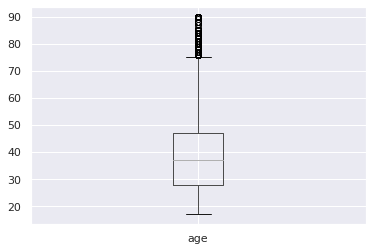

In [ ]:
dropped_df[['age']].boxplot()
plt.show()

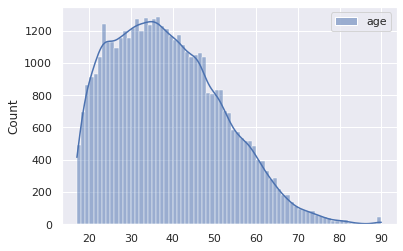

In [ ]:
sns.histplot(dropped_df[['age']], binwidth=1, kde=True)
plt.show()

Positively skewed, but expected since the dataset represents the whole population so we won't remove all of them. However, it seems that people aged >= 90 are grouped into the 90 bin. We'll drop them.

In [ ]:
dropped_df = dropped_df[dropped_df['age']!=90].reset_index(drop=True)
dropped_df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,train
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45144,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,False
45145,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,False
45146,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,False
45147,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,False


### Hours per week

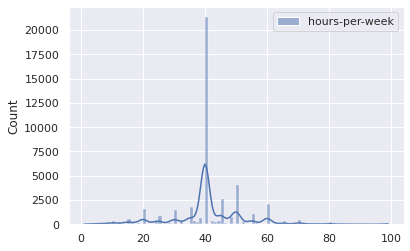

In [ ]:
sns.histplot(dropped_df[['hours-per-week']], binwidth=1, kde=True)
plt.show()

It's safe to assume that most people work for 8 hours a day for 5 days a week, which amounts to 40 hours a week.

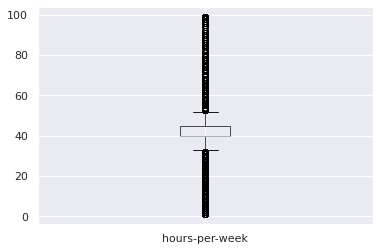

In [ ]:
dropped_df[['hours-per-week']].boxplot()
plt.show()

The seemingly many outliers is because so many people work between 40 to 45 hours.

In [ ]:
q1 = np.quantile(dropped_df[['hours-per-week']],0.25)
q2 = np.quantile(dropped_df[['hours-per-week']],0.50)
q3 = np.quantile(dropped_df[['hours-per-week']],0.75)


print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")

Q1: 40.0
Q2: 40.0
Q3: 45.0


We may classify the lower 'outliers' as part-timers and the upper 'outliers' as overworking.

In [ ]:
iqr = q3-q1

bins = [0, q1-1.5*iqr, q3+1.5*iqr, np.inf]
names = ['part-timers', 'full-timers', 'overworking']

dropped_df['categorical-hours-per-week'] = pd.cut(dropped_df['hours-per-week'], bins=bins, labels=names)
dropped_df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,train,categorical-hours-per-week
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True,full-timers
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True,part-timers
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True,full-timers
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True,full-timers
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True,full-timers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45144,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,False,full-timers
45145,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,False,full-timers
45146,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,False,full-timers
45147,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,False,full-timers


### Capital gain and loss

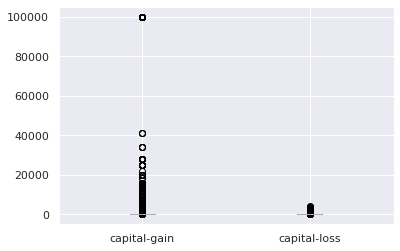

In [ ]:
dropped_df[['capital-gain', 'capital-loss']].boxplot()
plt.show()

Assuming people who don't invest their money don't experience capital gain or loss, most people don't seem to invest their money. What part of the population actually made/lost money? Invest (non-zero capital gain or loss)?

In [ ]:
print(f"Made money: {np.average((dropped_df['capital-gain']-dropped_df['capital-loss']) > 0)*100}%")
print(f"Lost money: {np.average((dropped_df['capital-gain']-dropped_df['capital-loss']) < 0)*100}%")
print(f"Invest: {np.average((dropped_df['capital-gain'] > 0) | (dropped_df['capital-loss'] > 0))*100}%")
print(f"Made AND Lost money: {np.average((dropped_df['capital-gain'] > 0) & (dropped_df['capital-loss'] > 0))*100}%")

Made money: 8.365633790338658%
Lost money: 4.733216682540034%
Invest: 13.09885047287869%
Made AND Lost money: 0.0%


The percentage of people who made money + people who lost money = people who invest. Therefore, the `capital-gain` and `capital-loss` features are net. We can combine the two into `net-capital-gain` and not lose any information.

In [ ]:
dropped_df['net-capital-gain'] = dropped_df['capital-gain']-dropped_df['capital-loss']
dropped_df = dropped_df[[i for i in dropped_df.columns if i not in ['capital-gain','capital-loss']]]
dropped_df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,train,categorical-hours-per-week,net-capital-gain
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,True,full-timers,2174
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,True,part-timers,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,True,full-timers,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,True,full-timers,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,True,full-timers,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45144,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,40,United-States,<=50K,False,full-timers,0
45145,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K,False,full-timers,0
45146,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K,False,full-timers,0
45147,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K,False,full-timers,5455


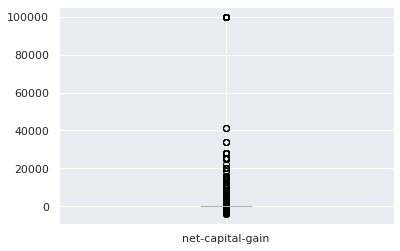

In [ ]:
dropped_df[['net-capital-gain']].boxplot()
plt.show()

Flag people who invested (experienced capital gain or loss).

In [ ]:
dropped_df['invest'] = dropped_df['net-capital-gain'].apply(lambda gain: False if gain==0 else True)
dropped_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,train,categorical-hours-per-week,net-capital-gain,invest
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,True,full-timers,2174,True
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,True,part-timers,0,False
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,True,full-timers,0,False
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,True,full-timers,0,False
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,True,full-timers,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45144,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,40,United-States,<=50K,False,full-timers,0,False
45145,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K,False,full-timers,0,False
45146,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K,False,full-timers,0,False
45147,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K,False,full-timers,5455,True


### Target feature analysis

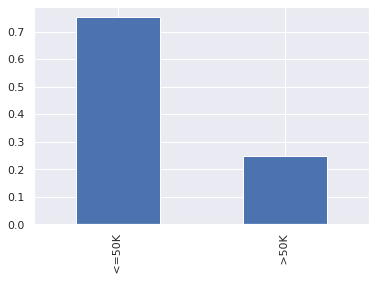

In [ ]:
dropped_df['income'].value_counts(normalize=True).plot(kind='bar')
plt.show()

The distribution seems to be slightly unbalanced, which is expected since income is a rightly-skewed distribution.

### Reordering features and encoding binary features

Encode the `income` feature.

In [ ]:
dropped_df['over-50k'] = False
dropped_df['over-50k'] = dropped_df['income'].apply(lambda income: True if income==" >50K" else False)

Encode the `sex` feature.

In [ ]:
dropped_df['sex'] = dropped_df['sex'].map({' Male': 1,
                                           ' Female': 0
})

In [ ]:
dropped_df = dropped_df[['over-50k', 'age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'categorical-hours-per-week', 'native-country', 'net-capital-gain', 'invest', 'train']]
dropped_df

,over-50k,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,categorical-hours-per-week,native-country,net-capital-gain,invest,train
0,False,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,full-timers,United-States,2174,True,True
1,False,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,part-timers,United-States,0,False,True
2,False,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,full-timers,United-States,0,False,True
3,False,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,full-timers,United-States,0,False,True
4,False,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,full-timers,Cuba,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45144,False,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,1,40,full-timers,United-States,0,False,False
45145,False,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,0,36,full-timers,United-States,0,False,False
45146,False,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,1,50,full-timers,United-States,0,False,False
45147,False,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,40,full-timers,United-States,5455,True,False


### One-hot encoding and reordering

In [ ]:
dummied_dropped_df = pd.get_dummies(dropped_df)
dummied_dropped_df

,over-50k,age,sex,hours-per-week,net-capital-gain,invest,train,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,False,39,1,40,2174,True,True,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,False,50,1,13,0,False,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,False,38,1,40,0,False,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,False,53,1,40,0,False,True,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,False,28,0,40,0,False,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45144,False,33,1,40,0,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45145,False,39,0,36,0,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45146,False,38,1,50,0,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45147,False,44,1,40,5455,True,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Correlation Analysis

In [ ]:
# Using non-parametric approach since the features are not normally distributed
dummied_dropped_df.corr(method='spearman').style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).set_precision(2)

Insights:
- `Workclass` are negatively correlated to each other, which makes sense since each person work only one job
- `Marital status` are negatively correlated to each other as well
- `Sex` is positively correlated, this may be because the sensus was taken in 1994, in which the number of career women wasn't as many as it is now
- Being married and age are negatively correlated, as expected
- Being a husband and being male are positively correlated, as expected
- `categorical-hours-per-week` and `hours-per-week` are strongly correlated
- Categorising `hours-per-week` yields lower correlation
- `native-country` doesn't predict income very well

CTA:
- Drop `native-country`
- Drop `categorical-hours-per-week`

In [ ]:
hi_corr_df = dropped_df.drop(columns=['categorical-hours-per-week', 'native-country'])
hi_corr_df

,over-50k,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,net-capital-gain,invest,train
0,False,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,2174,True,True
1,False,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,0,False,True
2,False,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,0,False,True
3,False,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,0,False,True
4,False,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45144,False,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,1,40,0,False,False
45145,False,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,0,36,0,False,False
45146,False,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,1,50,0,False,False
45147,False,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,40,5455,True,False


In [ ]:
dummied_hi_corr_df = pd.get_dummies(hi_corr_df)
dummied_hi_corr_df.corr(method='spearman').style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).set_precision(2)

# Modelling

## Importing

In [ ]:
train_df, test_df = hi_corr_df[hi_corr_df['train']==True].drop(columns=['train']), hi_corr_df[hi_corr_df['train']==False].drop(columns=['train'])
train_df

,over-50k,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,net-capital-gain,invest
0,False,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,2174,True
1,False,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,0,False
2,False,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,0,False
3,False,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,0,False
4,False,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
30100,False,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,0,38,0,False
30101,True,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,0,False
30102,False,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,0,40,0,False
30103,False,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,1,20,0,False


Separate the data into target and feature.

In [ ]:
X_train, y_train = train_df.drop(columns=['over-50k']), train_df['over-50k']
X_test, y_test = test_df.drop(columns=['over-50k']), test_df['over-50k']

Use one-hot encoding that drops the first occurences.

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train

,age,sex,hours-per-week,net-capital-gain,invest,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,1,40,2174,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,50,1,13,0,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,38,1,40,0,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,53,1,40,0,False,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,0,40,0,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30100,27,0,38,0,False,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
30101,40,1,40,0,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
30102,58,0,40,0,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
30103,22,1,20,0,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Modeling

We used the logistic regression for this classification problem.

### Scikit

In [ ]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test)),
             index=['True <50k', 'True >50k'],
             columns=['Predicted <50k', 'Prediced >50k'])

,Predicted <50k,Prediced >50k
True <50k,10495,854
True >50k,1492,2203


In [ ]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.88      0.92      0.90     11349
        True       0.72      0.60      0.65      3695

    accuracy                           0.84     15044
   macro avg       0.80      0.76      0.78     15044
weighted avg       0.84      0.84      0.84     15044



### Statsmodel

In [ ]:
X_train['intercept'] = 1
X_test['intercept'] = 1

In [ ]:
model = Logit(y_train, X_train.astype('float'))

result = model.fit(maxiter=100)

result.summary()

         Current function value: 0.330638
         Iterations: 100


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               over-50k   No. Observations:                30105
Model:                          Logit   Df Residuals:                    30050
Method:                           MLE   Df Model:                           54
Date:                Mon, 15 Nov 2021   Pseudo R-squ.:                  0.4110
Time:                        13:34:33   Log-Likelihood:                -9953.9
converged:                      False   LL-Null:                       -16899.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
age                                       0.0271      0.002     15.846      0.000       0.024       0.030
sex                                       0.8559      0.079     10.843      0.000       0.701       1.011
hours-per-week                            0.0297      0.002     17.632      0.000       0.026       0.033
net-capital-gain                          0.0002   9.57e-06     19.274      0.000       0.000       0.000
invest                                    0.8153      0.055     14.903      0.000       0.708       0.922
workclass_ Local-gov                     -0.6967      0.112     -6.240      0.000      -0.916      -0.478
workclass_ Private                       -0.5062      0.093     -5.461      0.000      -0.688      -0.325
workclass_ Self-emp-inc                  -0.3429      0.122     -2.804      0.005      -0.583      -0.103
workclass_ Self-emp-not-inc              -1.0095      0.109     -9.286      0.000      -1.223      -0.796
workclass_ State-gov                     -0.8434      0.124     -6.795      0.000      -1.087      -0.600
workclass_ Without-pay                  -24.2258   7.19e+04     -0.000      1.000   -1.41e+05    1.41e+05
education_ 11th                           0.1108      0.212      0.522      0.602      -0.305       0.527
education_ 12th                           0.3836      0.275      1.396      0.163      -0.155       0.922
education_ 1st-4th                       -0.5991      0.474     -1.264      0.206      -1.528       0.329
education_ 5th-6th                       -0.5291      0.345     -1.533      0.125      -1.206       0.147
education_ 7th-8th                       -0.6352      0.243     -2.618      0.009      -1.111      -0.160
education_ 9th                           -0.3746      0.270     -1.386      0.166      -0.904       0.155
education_ Assoc-acdm                     1.3050      0.178      7.313      0.000       0.955       1.655
education_ Assoc-voc                      1.2646      0.172      7.355      0.000       0.928       1.602
education_ Bachelors                      1.9260      0.160     12.038      0.000       1.612       2.240
education_ Doctorate                      2.9490      0.221     13.366      0.000       2.517       3.381
education_ HS-grad                        0.7827      0.156      5.027      0.000       0.478       1.088
education_ Masters                        2.2618      0.171     13.253      0.000       1.927       2.596
education_ Preschool                    -21.2182   4809.802     -0.004      0.996   -9448.256    9405.820
education_ Prof-school                    2.8635      0.205     13.982      0.000       2.462       3.265
education_ Some-college                   1.1192      0.158      7.085      0.000       0.810       1.429
marital-status_ Married-AF-spouse         2.6920      0.577      4.668      0.000       1.562       3.822
marital-status_ Married-civ-spouse        2.0239      0.272  

The model fails to converge. Maybe there's features that are too linearly dependent.